# Linear SVC Assignment

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Import the admissions data set (admissions.csv).

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


### Split the data into training and test sets, with the test set comprising 30% of the data.  Use `'Admitted'` as the target.

In [3]:
X = data.drop(['Admitted'], axis=1)
y = data['Admitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Generate an SVC model with a linear kernel. Set the regularization parameter (C) = 10. Check the score for both train and test sets. 

In [4]:
#SVC C=10
svc = SVC(C=10, kernel='linear')
svc.fit(X_train, y_train)

#scores
print('Train score (C=10):', svc.score(X_train, y_train))
print('Test score (C=10):', svc.score(X_test, y_test))

Train score (C=10): 0.9035714285714286
Test score (C=10): 0.85


### Choose some other values for C and show the difference between the scores for the train and test sets.

In [9]:
C_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 5, 15]
for i in C_list:
  svc_ = SVC(C=i, kernel='linear')
  svc_.fit(X_train, y_train)
  print('C=', i)
  print('Train score:', svc_.score(X_train, y_train))
  print('Test score:', svc_.score(X_test, y_test))

C= 1e-05
Train score: 0.6178571428571429
Test score: 0.6166666666666667
C= 0.0001
Train score: 0.8321428571428572
Test score: 0.7583333333333333
C= 0.001
Train score: 0.825
Test score: 0.8083333333333333
C= 0.01
Train score: 0.8642857142857143
Test score: 0.8166666666666667
C= 0.1
Train score: 0.8821428571428571
Test score: 0.825
C= 1.0
Train score: 0.8857142857142857
Test score: 0.8666666666666667
C= 5
Train score: 0.8928571428571429
Test score: 0.8333333333333334
C= 15
Train score: 0.9
Test score: 0.8416666666666667


### What if we switched up the target variable? Let assume that we know whether a student was admitted. Let's try to predict what their SchoolRank was. 

Create an SVC model with a linear kernel with the SchoolRank field as the target variable. Report both the train and the test scores.

In [11]:
data.SchoolRank.nunique()

5

In [10]:
X_new = data.drop(['SchoolRank'], axis=1)
y_new = data['SchoolRank']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3)

In [12]:
#svc model
svc_rank = SVC(C=10, kernel='linear')
svc_rank.fit(X_train_new, y_train_new)

#scores
print('Train score (C=10):', svc_rank.score(X_train_new, y_train_new))
print('Test score (C=10):', svc_rank.score(X_test_new, y_test_new))

Train score (C=10): 0.6107142857142858
Test score (C=10): 0.6333333333333333


In [13]:
#see differences in scores when C is changed for target=SchoolRank
C_list = [0.0001, 0.001, 0.01, 0.1, 1.0, 5, 15]
for i in C_list:
  svc_ = SVC(C=i, kernel='linear')
  svc_.fit(X_train_new, y_train_new)
  print('C=', i)
  print('Train score:', svc_.score(X_train_new, y_train_new))
  print('Test score:', svc_.score(X_test_new, y_test_new))

C= 0.0001
Train score: 0.3464285714285714
Test score: 0.425
C= 0.001
Train score: 0.44285714285714284
Test score: 0.5416666666666666
C= 0.01
Train score: 0.5142857142857142
Test score: 0.55
C= 0.1
Train score: 0.5821428571428572
Test score: 0.6333333333333333
C= 1.0
Train score: 0.6142857142857143
Test score: 0.6333333333333333
C= 5
Train score: 0.6035714285714285
Test score: 0.6083333333333333
C= 15
Train score: 0.6
Test score: 0.65


### Show confusion matrices for the training and test sets, and a classification report for the test set. What trends do you notice?

In [14]:
svc_rank.classes_

array([1, 2, 3, 4, 5])

In [22]:
data.SchoolRank.value_counts()

3    133
2    107
4     74
5     60
1     26
Name: SchoolRank, dtype: int64

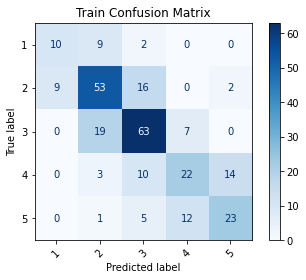

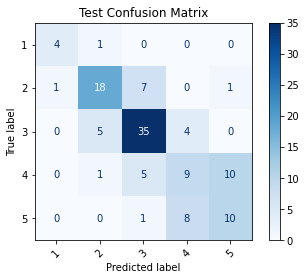

In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
#confusion matrix for training
y_train_pred = svc_rank.predict(X_train_new)
cm_train = confusion_matrix(y_train_new, y_train_pred, labels=[1, 2, 3, 4, 5])
plot_confusion_matrix(svc_rank, X_train_new, y_train_new, cmap='Blues', xticks_rotation=45)
plt.title('Train Confusion Matrix')
#confusion matrix for test
y_test_pred = svc_rank.predict(X_test_new)
cm_test = confusion_matrix(y_test_new, y_test_pred, labels=[1, 2, 3, 4, 5])
plot_confusion_matrix(svc_rank, X_test_new, y_test_new, cmap='Blues', xticks_rotation=45)
plt.title('Test Confusion Matrix')
plt.show()

In [21]:
#classification report for target=SchoolRank
print('Classification report for prediciton of School Rank:')
print(classification_report(y_test_new, y_test_pred))

Classification report for prediciton of School Rank:
              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.72      0.67      0.69        27
           3       0.73      0.80      0.76        44
           4       0.43      0.36      0.39        25
           5       0.48      0.53      0.50        19

    accuracy                           0.63       120
   macro avg       0.63      0.63      0.63       120
weighted avg       0.63      0.63      0.63       120



There is very small amount of data which shows in the support column. The model is better at predicting School Rank 2 and 3. School Rank 1 shows even numbers because so few numbers of observations in the class.